In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
grid_size = 20

In [5]:
os.system("cp pixelTrain.h5 pixelTrainCopy.h5 ")
df = pandas.HDFStore("pixelTrainCopy.h5", 'r')
os.system("rm pixelTrainCopy.h5")

0

In [6]:
df = df.select("df",stop=-1)
df = df[(df["GenDeltaR"]<0.1) & (df["nUniqueSimTracksInSharedHit"]>-1)]
df = df[(df["isSharedHit"]>0)]

In [7]:
#Rearrange dataframe columns
df['width'] = np.zeros(len(df))
df['length'] = np.zeros(len(df))
cols = ['isSharedHit'] + ['trackPt'] + ['trackEta']  + ['trackPhi'] + ['nUniqueSimTracksInSharedHit'] + ['GenDeltaR'] + ['length'] + ['width'] + ['uniqueSimTrackIds']
header_size = 9
for x in range (0, grid_size*grid_size):
    cols = cols + ['pixel_%i' %(x)]

df = df[cols]

df.head()

,isSharedHit,trackPt,trackEta,trackPhi,nUniqueSimTracksInSharedHit,GenDeltaR,length,width,uniqueSimTrackIds,pixel_0,...,pixel_390,pixel_391,pixel_392,pixel_393,pixel_394,pixel_395,pixel_396,pixel_397,pixel_398,pixel_399
1,1,5.279681,-0.096392,5.279681,1.0,0.001625,0.0,0.0,[2212],0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1,2.754200,-1.903400,2.754200,2.0,0.011995,0.0,0.0,"[-211, 2212]",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,1,6.247725,-1.407947,6.247725,2.0,0.001147,0.0,0.0,"[-211, 2212]",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,1,2.774481,-1.903494,2.774481,2.0,0.012051,0.0,0.0,"[-211, 2212]",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,1,6.264533,-1.408100,6.264533,2.0,0.001034,0.0,0.0,"[-211, 2212]",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Add hit Length and Width to dataframe
lengths = np.zeros(len(df))
widths = np.zeros(len(df))

for x in range (0, len(df)):
    s = df.iloc[x, header_size:(grid_size*grid_size)+header_size]
    yHist = np.zeros(grid_size)
    xHist = np.zeros(grid_size)
    for row in range (0, grid_size):
        for col in range (0, grid_size):
            index = (row*grid_size) + col
            yHist[row] += s[index]
            xHist[col] += s[index]
    
    length = 0
    width = 0
    for i in range (0, grid_size):
        if (yHist[i] != 0): 
            length += 1
        if (xHist[i] != 0): 
            width +=1
    lengths[x] = length
    widths[x] = width

df['length'] = lengths
df['width'] = widths

df.head()

,isSharedHit,trackPt,trackEta,trackPhi,nUniqueSimTracksInSharedHit,GenDeltaR,length,width,uniqueSimTrackIds,pixel_0,...,pixel_390,pixel_391,pixel_392,pixel_393,pixel_394,pixel_395,pixel_396,pixel_397,pixel_398,pixel_399
1,1,5.279681,-0.096392,5.279681,1.0,0.001625,1.0,2.0,[2212],0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1,2.754200,-1.903400,2.754200,2.0,0.011995,8.0,2.0,"[-211, 2212]",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,1,6.247725,-1.407947,6.247725,2.0,0.001147,5.0,1.0,"[-211, 2212]",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,1,2.774481,-1.903494,2.774481,2.0,0.012051,8.0,2.0,"[-211, 2212]",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,1,6.264533,-1.408100,6.264533,2.0,0.001034,5.0,1.0,"[-211, 2212]",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Plot a hit given the hit number and dataframe
def plotHit(x, df):
    s = df.iloc[x, header_size:(grid_size*grid_size)+header_size]
    isMerged = "Not Merged"
    if df.iloc[x, 4] > 1:
        isMerged = "Merged"

    df2 = pandas.DataFrame(columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'])
    
    for y in range (0, grid_size):
        z = grid_size * y
        df2.loc[y] = [s[z + 0], s[z + 1], s[z + 2], s[z + 3], s[z + 4], s[z + 5], s[z + 6], s[z + 7], s[z + 8], s[z + 9], s[z + 10], s[z + 11], s[z + 12], s[z + 13], s[z + 14], s[z + 15], s[z + 16], s[z + 17], s[z + 18], s[z + 19]]

    plt.imshow(df2, cmap="viridis")
    plt.colorbar()
    
    pdgIds = np.array_str(df.iloc[x, 8])
    
    plt.title('Charge Dirstribution for Hit %i (%s) \n nUniqueSimTracks = %i \n Length = %i    Width = %i \n PDG Ids: %s' 
              %(x, isMerged, df.iloc[x, 4], df.iloc[x,6], df.iloc[x, 7], pdgIds))
    #plt.savefig("%sx%s/Hit %i.png" %(grid_size, grid_size, x))
    plt.show()

In [10]:
# Some Grid Size checks
max_length = 0
max_width = 0

longest = 0
widest = 0

for x in range (0, len(df)):
    if (df.iloc[x, 6] > max_length):
        max_length = df.iloc[x, 6]
        longest = x
    if (df.iloc[x, 7] > max_width):
        max_width = df.iloc[x, 7]
        widest = x
        
print("Maximum Length = %i" %(max_length))
print("Hit %i is the longest" %(longest))
print("Maximum Width = %i" %(max_width))
print("Hit %i is the widest" %(widest))

Maximum Length = 17
Hit 601 is the longest
Maximum Width = 17
Hit 477 is the widest


In [16]:
# Plot hits that extend beyond the grid size
bigger = 0
for x in range (0, len(df)):
    if (df.iloc[x, 6] == grid_size) or (df.iloc[x, 7] == grid_size):
        plotHit(x, df)
        bigger +=1
    
print("%i hits found." %(bigger))

0 hits found.


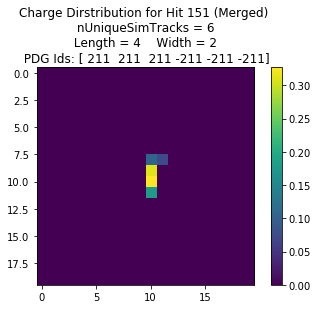

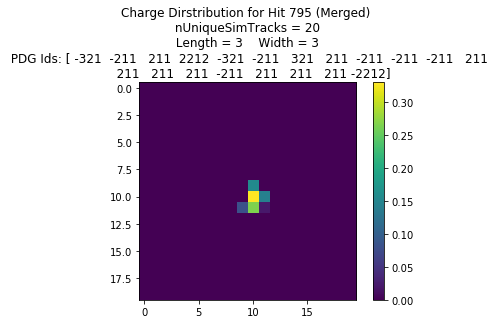

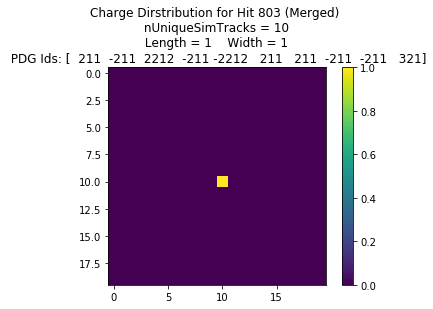

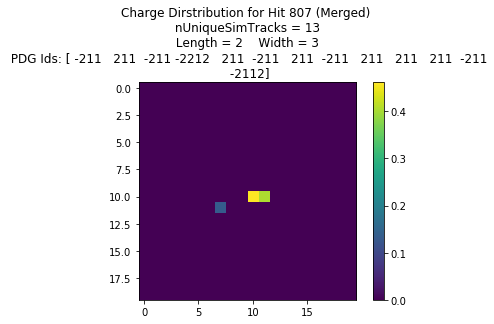

4 hits found.


In [17]:
# Plot hits that have more than 4 Sim Tracks
bigger = 0
for x in range (0, len(df)):
    if (df.iloc[x, 4] > 4):
        plotHit(x, df)
        bigger +=1
    
print("%i hits found." %(bigger))

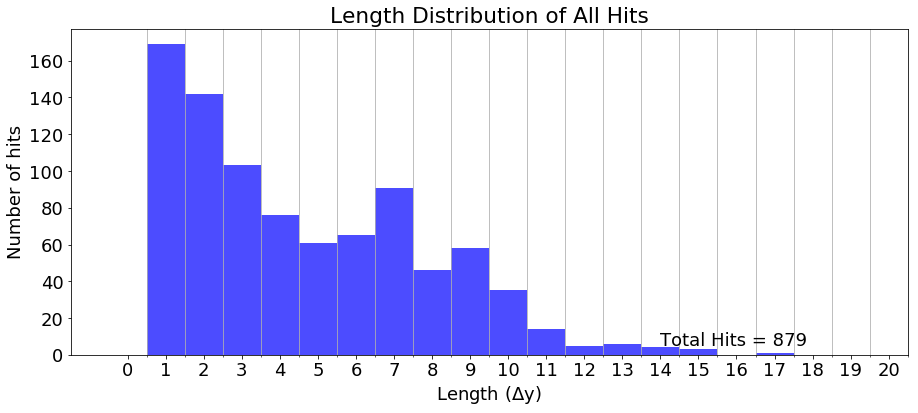

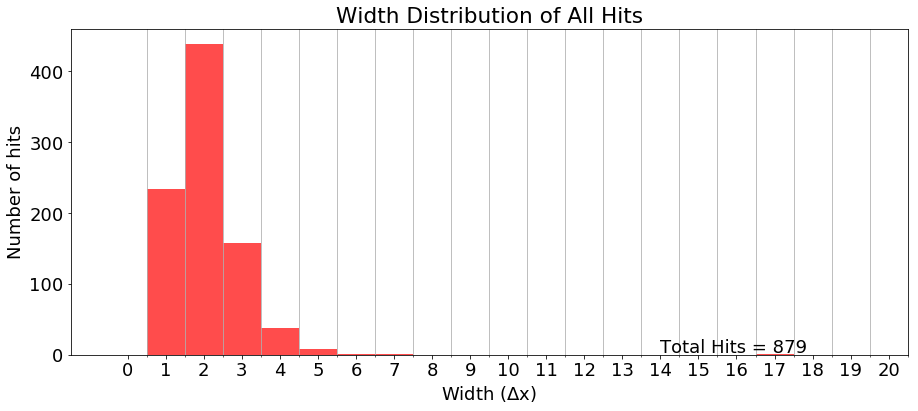

In [18]:
# Plot Length and Width Distribution of ALL Hits
plt.rcParams.update({'font.size': 18})
xAxis = np.arange(grid_size + 1)
xAxisMinor = np.arange(0.5, grid_size + 1.5, 1)


fig= plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(xAxis)
ax.set_xticks(xAxisMinor, minor=True)
ax.xaxis.grid(True, which='minor')

plt.hist(df['length'], bins = xAxis, label='Length ($\Delta$y)', alpha = 0.7, color = 'b', align='left')
plt.text(0.7*grid_size, 5, "Total Hits = %i" %(len(df)))

plt.xticks(xAxis)
plt.xlabel('Length ($\Delta$y)')
plt.ylabel('Number of hits')
plt.title('Length Distribution of All Hits')

plt.show()


fig= plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(xAxis)
ax.set_xticks(xAxisMinor, minor=True)
ax.xaxis.grid(True, which='minor')

plt.hist(df['width'], bins = xAxis, label='Width ($\Delta$x)', alpha = 0.7, color = 'r', align='left')
plt.text(0.7*grid_size, 4, "Total Hits = %i" %(len(df)))

plt.xticks(xAxis)
plt.xlabel('Width ($\Delta$x)')
plt.ylabel('Number of hits')
plt.title('Width Distribution of All Hits')

plt.show()

plt.rcParams.update({'font.size': 10})

In [19]:
dfMerged = df[df['nUniqueSimTracksInSharedHit'] > 1] 
dfNotMerged = df[df['nUniqueSimTracksInSharedHit'] == 1] 

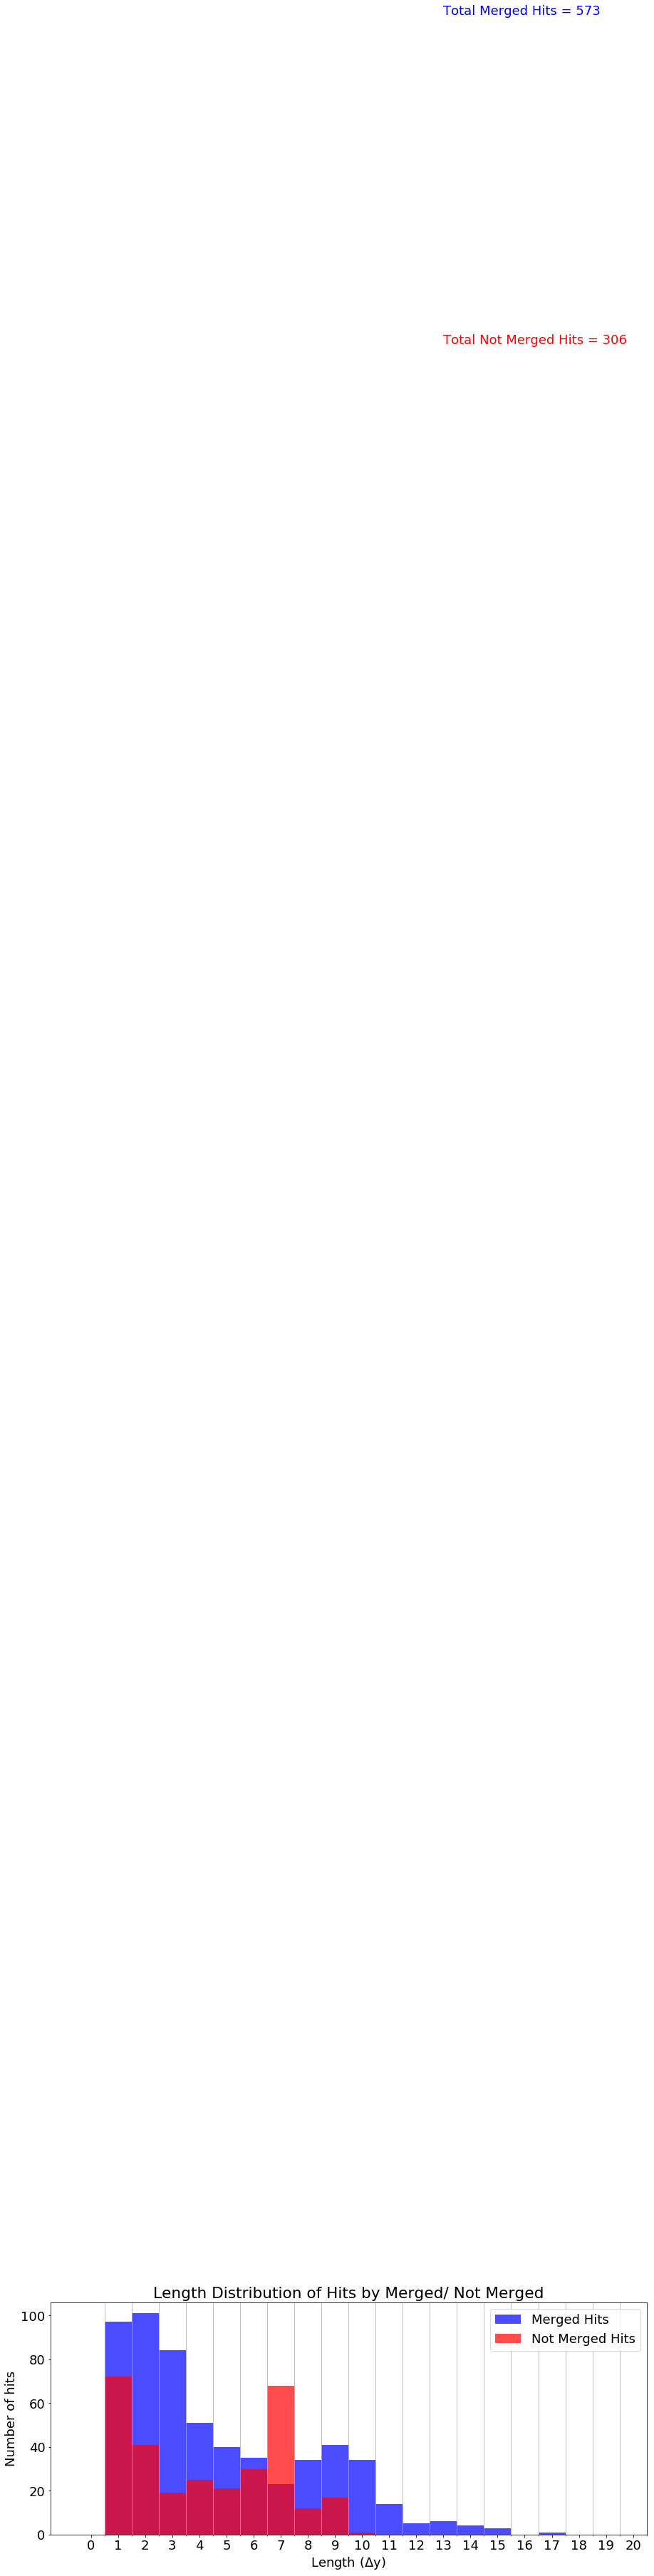

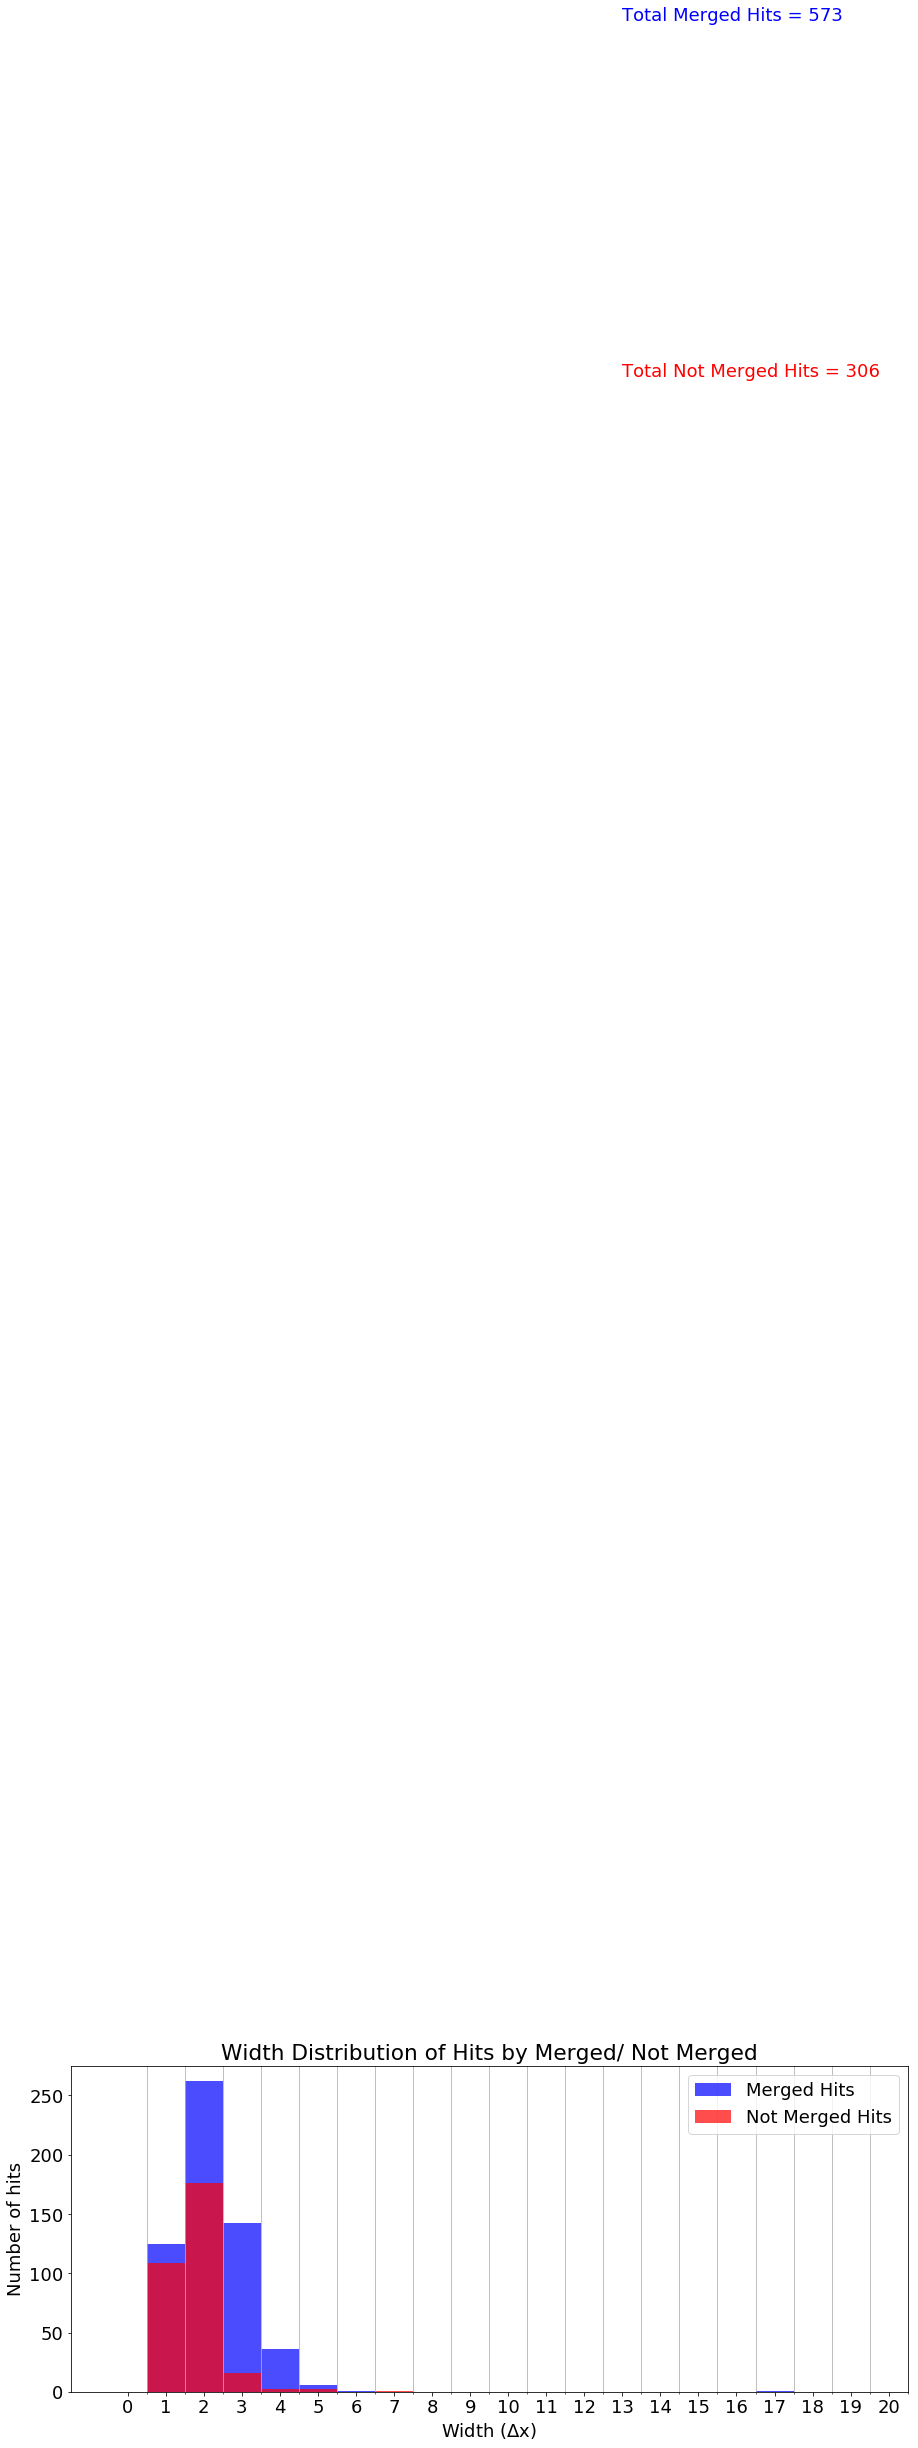

In [20]:
# Plot Length and Width Distribution of Merged/ Not Merged Hits
plt.rcParams.update({'font.size': 18})

xAxis = np.arange(grid_size+1)
xAxisMinor = np.arange(0.5, grid_size+1.5, 1)

fig= plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(xAxis)
ax.set_xticks(xAxisMinor, minor=True)
ax.xaxis.grid(True, which='minor')

plt.hist(dfMerged['length'], bins = xAxis, label='Merged Hits', alpha = 0.7, color = 'b', align='left')
plt.hist(dfNotMerged['length'], bins = xAxis, label='Not Merged Hits', alpha = 0.7, color = 'r', align='left')
plt.text(0.65*grid_size, 1150, "Total Merged Hits = %i" %(len(dfMerged)), color = 'b')
plt.text(0.65*grid_size, 1000, "Total Not Merged Hits = %i" %(len(dfNotMerged)), color = 'r')

plt.xlabel('Length ($\Delta$y)')
plt.ylabel('Number of hits')
plt.title('Length Distribution of Hits by Merged/ Not Merged')
plt.legend()

plt.show()




fig= plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(xAxis)
ax.set_xticks(xAxisMinor, minor=True)
ax.xaxis.grid(True, which='minor')

plt.hist(dfMerged['width'], bins = xAxis, label='Merged Hits', alpha = 0.7, color = 'b', align='left')
plt.hist(dfNotMerged['width'], bins = xAxis, label='Not Merged Hits', alpha = 0.7, color = 'r', align='left')
plt.text(0.65*grid_size, 2000, "Total Merged Hits = %i" %(len(dfMerged)), color = 'b')
plt.text(0.65*grid_size, 1700, "Total Not Merged Hits = %i" %(len(dfNotMerged)), color = 'r')


plt.xticks(xAxis)
plt.xlabel('Width ($\Delta$x)')
plt.ylabel('Number of hits')
plt.title('Width Distribution of Hits by Merged/ Not Merged')
plt.legend()
plt.show()

plt.rcParams.update({'font.size': 10})

In [21]:
lowEtaCutoff = 0.5
highEtaCutoff = 1.0
dfLowEta = df[np.abs(df['trackEta']) < lowEtaCutoff] 
dfHighEta = df[np.abs(df['trackEta']) > highEtaCutoff] 

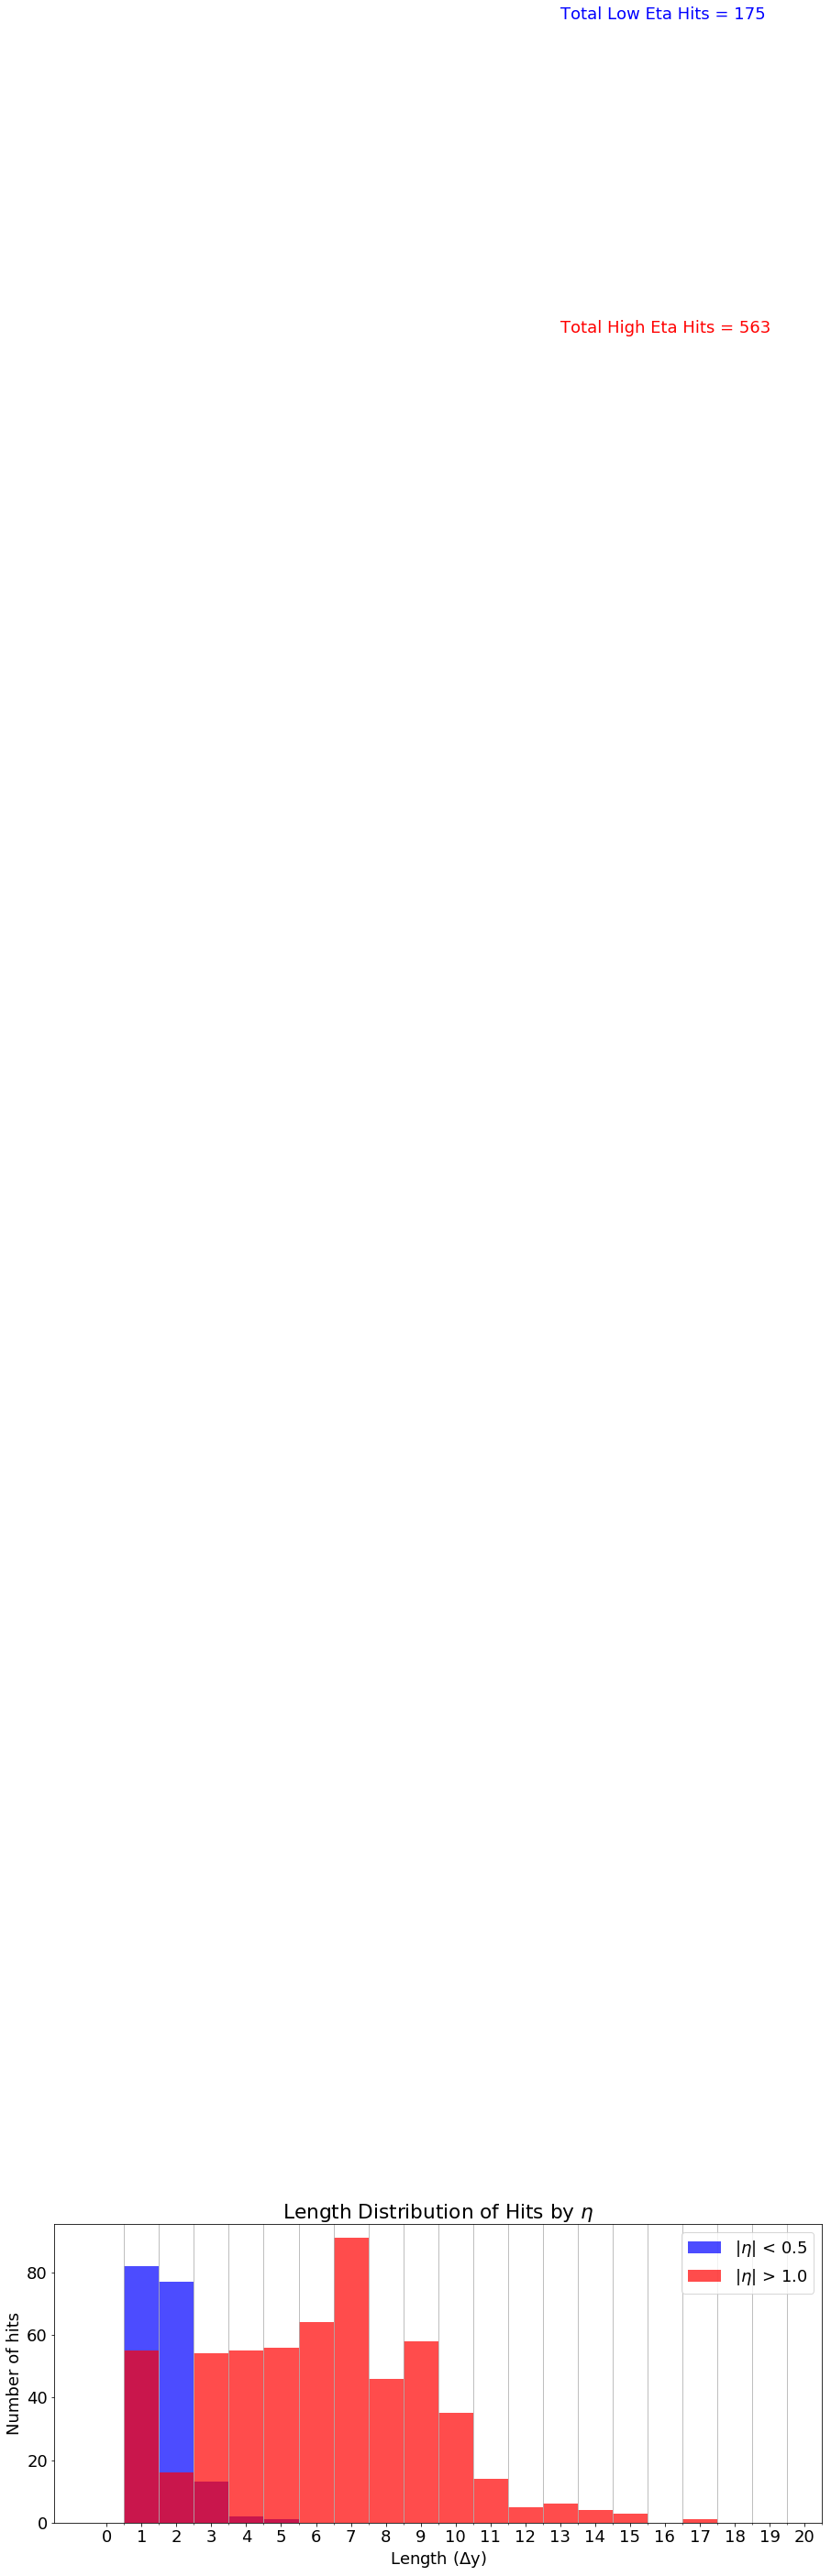

In [22]:
# Plot Length and Width Distribution by Eta
plt.rcParams.update({'font.size': 18})

xAxis = np.arange(grid_size+1)
xAxisMinor = np.arange(0.5, grid_size+1.5, 1)

fig= plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)
plt.xticks(xAxis)
ax.set_xticks(xAxisMinor, minor=True)
ax.xaxis.grid(True, which='minor')

plt.hist(dfLowEta['length'], bins = xAxis, label='$|\eta|$ < %.1f' %(lowEtaCutoff), alpha = 0.7, color = 'b', align='left')
plt.hist(dfHighEta['length'], bins = xAxis, label='$|\eta|$ > %.1f'%(highEtaCutoff), alpha = 0.7, color = 'r', align='left')
plt.text(0.65*grid_size, 800, "Total Low Eta Hits = %i" %(len(dfLowEta)), color = 'b')
plt.text(0.65*grid_size, 700, "Total High Eta Hits = %i" %(len(dfHighEta)), color = 'r')

plt.xlabel('Length ($\Delta$y)')
plt.ylabel('Number of hits')
plt.title('Length Distribution of Hits by $\eta$')
plt.legend()

plt.show()


plt.rcParams.update({'font.size': 10})